<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task6/blob/main/Assignment8(Car_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


Car dataset

In [95]:
data = pd.read_csv('car_data.csv')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [96]:
data.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [97]:
#checking for outliers 
#for Mileage	 column
iqr = data.Mileage.quantile(0.75) - data.Mileage.quantile(0.25)
upper_threshold = data.Mileage.quantile(0.75) + (1.5 * iqr)
lower_threshold = data.Mileage.quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-1260.75
41097.25


In [98]:
#there is no value less than lower threshold but there are some values greater than upper threshold, so there are outliers...and we need to remove them using capping

data.Mileage = data.Mileage.clip(-1260, 41097)

In [79]:
data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [80]:
data=data.drop_duplicates()  #deletes if any duplicate records are found
data.shape

(804, 12)

In [81]:
data.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

# **Part 1:**

**Task 1:** Find the linear regression equation for mileage vs price.

In [67]:
X = data[['Mileage']].values #feature
y = data['Price'].values  #target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((643, 1), (161, 1))

In [68]:
#fitting the model
from sklearn.linear_model import LinearRegression
car_reg=LinearRegression()
car_reg.fit(X_train,y_train)


LinearRegression()

In [69]:
#finding the values of m and c
coefficient= car_reg.coef_
intercept= car_reg.intercept_
coefficient

array([-0.17027902])

In [70]:
#printing the linear regression equation y=mx+c
print("Linear Regression Equation: y = {:.2f} * mileage + {:.2f}".format(coefficient[0], intercept))

Linear Regression Equation: y = -0.17 * mileage + 24814.20


In [71]:
y_pred = car_reg.predict(X_test) 


In [72]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(10)

,Actual,Predicted
0,38208.501023,19483.954880
1,10872.013926,20409.251048
2,16997.693741,20415.891929
3,20627.661689,21277.503745
4,44084.914212,21175.847173
5,20221.808811,20348.972277
6,20017.968430,20943.927155
7,30959.932133,21804.857855
8,35622.139495,23053.513872
9,12570.136681,20986.496909


**Task2:** Chart the original data and the equation on the chart.

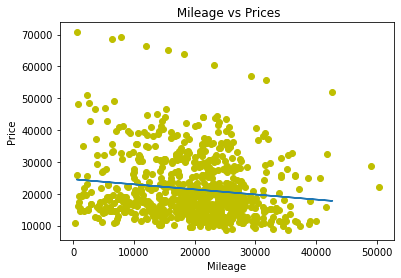

In [45]:
plt.scatter(X, y, color='y')
plt.plot(X_test, car_reg.predict(X_test))
plt.title(' Mileage vs Prices')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

**Task 3:** Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data.

In [73]:
#print('R2- SCORE:', gcc.score(X,y))
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
car_reg.score(X_test,y_test) 

R2- SCORE: 0.02454723349143273


0.02454723349143273

The R2-Score is very low which means the above equation is not a good fit for the data

# **Part 1:**
**Task 1:** Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [132]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = data[feature].values
y = data['Price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape,X_test.shape

((562, 7), (242, 7))

In [133]:
#fitting the model
from sklearn.linear_model import LinearRegression
carprice_reg=LinearRegression()
carprice_reg.fit(X_train, y_train)

LinearRegression()

In [134]:
#finding the values of m and c
coefficient= carprice_reg.coef_
intercept= carprice_reg.intercept_
print("Intercept:",intercept)
print("Coefficients:", coefficient)

Intercept: 5439.222579787962
Coefficients: [-1.38803850e-01  4.92048052e+03 -2.33896075e+03 -1.62616898e+03
  6.29883387e+03 -2.09291288e+03  3.02133984e+03]


In [135]:
y_pred = carprice_reg.predict(X_test)


In [136]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
0,24903.477739,14812.165895
1,12274.957581,21228.132789
2,21200.690207,30436.168530
3,29321.082506,19566.503797
4,16792.679529,29309.060772


**Task2:**  Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [137]:
from sklearn import metrics
print('R2- SCORE for equation using all the columns:', metrics.r2_score(y_test,y_pred))


R2- SCORE for equation using all the columns: 0.46836750826367846


The R2-Score is less than 0.8 which means the above equation is not a good fit for the data

**Task3:** Find the combination of the factors that is the best predictor for price.

In [166]:
# find the best combination?
import itertools

combos = []  
for i in range(1, 8):
    combos.append(itertools.combinations(feature, i)) 


In [177]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline, preprocessing

check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = data[groupx]
        #degrees = 8
        
        for degree in range(1,8):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)
        


0 ['Cylinder'] 0


# **Hard Mode:**
**Task 1:** Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [179]:
df_with_dummies = pd.get_dummies(data, columns = ['Make', 'Model', 'Type'])
df_with_dummies

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [180]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns].values
y = df_with_dummies['Price'].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

regr= LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [181]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X_test, y_test))

Intercept: 24559.59548831698
Coefficient: [-1.84941235e-01 -1.07552437e+03  5.54451775e+03 -2.23142908e+03
  2.77771320e+01  1.84857853e+02  2.85910511e+02 -3.68661639e+03
 -5.38984527e+03 -5.47287497e+03  7.15036259e+03  1.24279191e+04
 -5.02894505e+03 -1.58558143e+03 -5.63539610e+03  2.22913574e+03
 -1.75926885e+03  6.75111064e+03]
Score: 0.9203991724223272


R2-Score is **0.920399** which is greater than 0.8 which indicates the it is a good fit